In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/titanic_data.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_t=df.drop(['Name','Ticket'], axis=1)

In [ ]:
df_t.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bf328f750>,
      dtype=object)

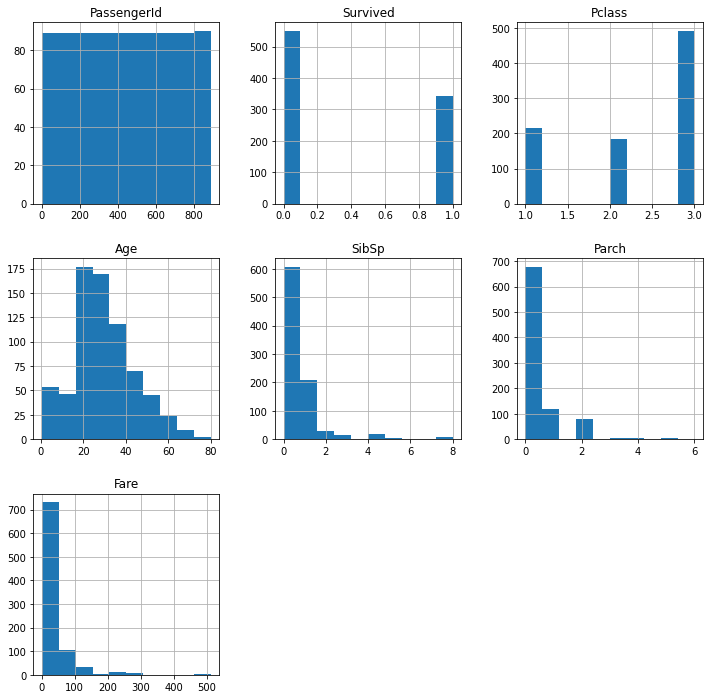

In [ ]:
df_t.hist(figsize=(12,12))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


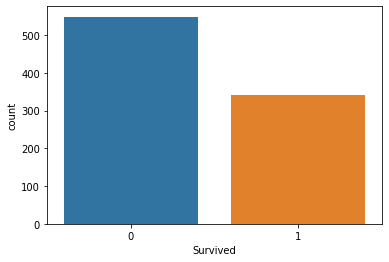

In [ ]:
sns.countplot(df_t['Survived'])

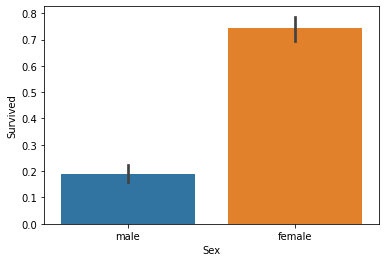

In [ ]:
sns.barplot(x='Sex',y='Survived',data=df_t)

In [ ]:
print("Percentage of passengers of Class1",
     df_t['Survived'][df_t['Pclass']==1].value_counts(normalize=True))

print("------------------------------------")

print("Percentage of passengers of Class2",
     df_t['Survived'][df_t['Pclass']==2].value_counts(normalize=True))

print("------------------------------------")

print("Percentage of passengers of Class3",
     df_t['Survived'][df_t['Pclass']==3].value_counts(normalize=True))

Percentage of passengers of Class1 1    0.62963
0    0.37037
Name: Survived, dtype: float64
------------------------------------
Percentage of passengers of Class2 0    0.527174
1    0.472826
Name: Survived, dtype: float64
------------------------------------
Percentage of passengers of Class3 0    0.757637
1    0.242363
Name: Survived, dtype: float64


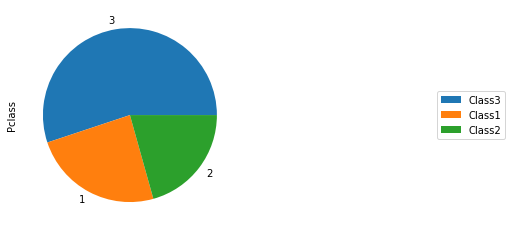

In [ ]:
df.Pclass.value_counts().plot.pie().\
            legend(labels=['Class3','Class1','Class2'],loc='center right', bbox_to_anchor=(2.25,0.5))

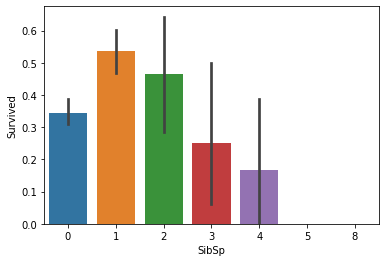

In [ ]:
sns.barplot(x='SibSp',y='Survived',data=df_t)

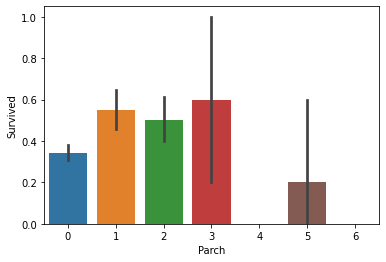

In [ ]:
sns.barplot(x='Parch',y='Survived',data=df_t)

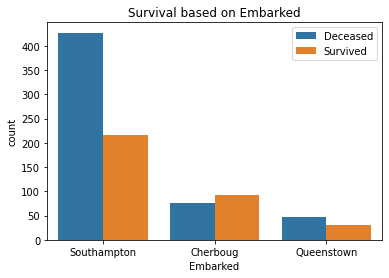

In [ ]:
p=sns.countplot(x='Embarked', hue='Survived', data=df_t)
p.set_xticklabels(['Southampton','Cherboug','Queenstown'])
p.set_title('Survival based on Embarked')
p.legend(labels=['Deceased','Survived'])

In [ ]:
df_t.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df_t.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_t=df_t.drop(['Cabin'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_t['Sex']=le.fit_transform(df_t['Sex'])
df_t.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [ ]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [ ]:
df_t.fillna(df_t.median(), inplace=True)

In [ ]:
df_t.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df_t.dropna(inplace=True)

In [ ]:
df_t['Embarked']=le.fit_transform(df_t['Embarked'])
df_t.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [ ]:
df_t.Age = df_t.Age.astype(int)
df_t.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,2
1,2,1,1,0,38,1,0,71.2833,0
2,3,1,3,0,26,0,0,7.9250,2
3,4,1,1,0,35,1,0,53.1000,2
4,5,0,3,1,35,0,0,8.0500,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df_t.drop(['Survived','PassengerId','Fare'],axis=1)
y = df_t['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3296)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1,max_depth=7,min_samples_split=2).fit(X_train,y_train)
clf.score(X_test,y_test)

0.8576779026217228

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
neigh.score(X_test,y_test)

0.7565543071161048

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(X_train,y_train)
lr.score(X_test,y_test)

0.8202247191011236

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
clf = make_pipeline(SVC(gamma='auto')).fit(X_train,y_train)
clf.score(X_test,y_test)

0.8239700374531835

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)#58080

0.846441947565543

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras

In [ ]:
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(39, activation='relu', input_shape=(n_cols,)))
model.add(Dense(27, activation='selu'))
model.add(Dense(19, activation='softplus'))
model.add(Dense(1, kernel_regularizer=keras.regularizers.l2(1e-2),activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, shuffle=False,epochs=160 )

Epoch 1/160
20/20 [==============================] - 1s 2ms/step - loss: 2.0463 - accuracy: 0.5867
Epoch 2/160
20/20 [==============================] - 0s 2ms/step - loss: 1.6184 - accuracy: 0.5867
Epoch 3/160
20/20 [==============================] - 0s 2ms/step - loss: 1.2583 - accuracy: 0.5867
Epoch 4/160
20/20 [==============================] - 0s 2ms/step - loss: 0.9820 - accuracy: 0.5867
Epoch 5/160
20/20 [==============================] - 0s 2ms/step - loss: 0.8144 - accuracy: 0.5867
Epoch 6/160
20/20 [==============================] - 0s 2ms/step - loss: 0.7437 - accuracy: 0.5867
Epoch 7/160
20/20 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.5867
Epoch 8/160
20/20 [==============================] - 0s 2ms/step - loss: 0.7163 - accuracy: 0.5867
Epoch 9/160
20/20 [==============================] - 0s 2ms/step - loss: 0.7130 - accuracy: 0.5867
Epoch 10/160
20/20 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.5867
Epoch 11/

In [ ]:
model.evaluate(X_test,y_test,verbose=0)

[0.431567519903183, 0.8576778769493103]

In [ ]:
pip install pyswarms

     |████████████████████████████████| 112kB 6.6MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pyswarms as ps
%load_ext autoreload
%autoreload 2

In [ ]:
INPUT_NODES = 6
HIDDEN_NODES = 20
OUTPUT_NODES = 2

In [ ]:
def one_hot_encode(Y):
    """
    create one-hot encoded vectors from target labels(Y).
    :param Y: int(N, )
    :return: int(N, C)
        Returns an array of shape(N, C) where C is number of classes.
    """
    num_unique = len(np.unique(np.array(Y)))
    zeros = np.zeros((len(Y), num_unique))
    zeros[range(len(Y)), Y] = 1
    return zeros

In [ ]:
def softmax(logits):
    """
    Apply softmax function on logits and return probabilities.
    :param logits: double(N, C)
        Logits of each instance for each class.
    :return: double(N, C)
        probability for each class of each instance.
    """
    exps = np.exp(logits)
    return exps / np.sum(exps, axis=1, keepdims=True)

In [ ]:
def Negative_Likelihood(probs, Y):
    """
    Calculates Negative Log Likelihood loss.
    :param probs: double(N, C)
        Probability of each instance for each class.
    :param Y: int(N, )
        Integer representation of each class.
    :return: double
        Returns value of loss calculated.
    """
    num_samples = len(probs)
    corect_logprobs = -np.log(probs[range(num_samples), Y])
    return np.sum(corect_logprobs) / num_samples

def Cross_Entropy(probs, Y):
    """
    Calculates Categorical Cross Entropy loss.
    :param probs: double(N, C)
        Probability of each instance for each class.
    :param Y: int(N, C)
        One-hot encoded representation of classes.
    :return: double
        Returns value of loss calculated.
    """
    num_samples = len(probs)
    ind_loss = np.max(-1 * Y * np.log(probs + 1e-12), axis=1)
    return np.sum(ind_loss) / num_samples

In [ ]:
def forward_pass(X, Y, W):
    """
    Performs forward pass during Neural Net training.
    :param X: double(N, F)
        X is input where N is number of instances and F is number of features.
    :param Y: int(N, ) | int(N, C)
        Y is target where N is number of instances and C is number of classes in case of
        one-hot encoded target.
    :param W: double(N, )
        Weights where N is number of total weights(flatten).
    :return: double
        Returns loss of forward pass.
    """

    if isinstance(W, Particle):
        W = W.x

    w1 = W[0 : INPUT_NODES * HIDDEN_NODES].reshape((INPUT_NODES, HIDDEN_NODES))
    b1 = W[INPUT_NODES * HIDDEN_NODES:(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES].reshape((HIDDEN_NODES, ))
    w2 = W[(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES:(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES +\
        (HIDDEN_NODES * OUTPUT_NODES)].reshape((HIDDEN_NODES, OUTPUT_NODES))
    b2 = W[(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES + (HIDDEN_NODES * OUTPUT_NODES): (INPUT_NODES *\
        HIDDEN_NODES) + HIDDEN_NODES + (HIDDEN_NODES * OUTPUT_NODES) + OUTPUT_NODES].reshape((OUTPUT_NODES, ))


    z1 = np.dot(X, w1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1, w2) + b2
    logits = z2

    probs = softmax(logits)
    return Negative_Likelihood(probs, Y)
    

In [ ]:
def predict(X, W):
    """
    Performs forward pass during Neural Net test.
    :param X: double(N, F)
        X is input where N is number of instances and F is number of features.
    :param W: double(N, )
        Weights where N is number of total weights(flatten).
    :return: int(N, )
        Returns predicted classes.
    """

    w1 = W[0: INPUT_NODES * HIDDEN_NODES].reshape((INPUT_NODES, HIDDEN_NODES))
    b1 = W[INPUT_NODES * HIDDEN_NODES:(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES].reshape((HIDDEN_NODES,))
    w2 = W[(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES:(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES + \
        (HIDDEN_NODES * OUTPUT_NODES)].reshape((HIDDEN_NODES, OUTPUT_NODES))
    b2 = W[(INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES + (HIDDEN_NODES * OUTPUT_NODES): (INPUT_NODES * \
        HIDDEN_NODES) + HIDDEN_NODES + (HIDDEN_NODES * OUTPUT_NODES) + OUTPUT_NODES].reshape((OUTPUT_NODES,))

    z1 = np.dot(X, w1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1, w2) + b2
    logits = z2

    probs = softmax(logits)
    Y_pred =  np.argmax(probs, axis=1)
    return Y_pred

In [ ]:

def get_accuracy(Y, Y_pred):
    """
    Calcualtes accuracy.
    :param Y: int(N, )
        Correct labels.
    :param Y_pred: int(N, ) | double(N, C)
        Predicted labels of shape(N, ) or (N, C) in case of one-hot vector.
    :return: double
        Accuracy.
    """
    return (Y == Y_pred).mean()

In [ ]:
import numpy as np

# This is a PSO(interia weight) variation...
class Particle:
    """
    Particle class represents a solution inside a pool(Swarm).
    """

    def __init__(self, no_dim, x_range, v_range):
        """
        Particle class constructor
        :param no_dim: int
            No of dimensions.
        :param x_range: tuple(double)
            Min and Max value(range) of dimension.
        :param v_range: tuple(double)
            Min and Max value(range) of velocity.
        """
        self.x = np.random.uniform(
            x_range[0], x_range[1], (no_dim,)
        )  # particle position in each dimension...
        self.v = np.random.uniform(
            v_range[0], v_range[1], (no_dim,)
        )  # particle velocity in each dimension...
        self.pbest = np.inf
        self.pbestpos = np.zeros((no_dim,))


class Swarm:
    """
    Swarm class represents a pool of solution(particle).
    """

    def __init__(self, no_particle, no_dim, x_range, v_range, iw_range, c):
        """
        Swarm class constructor.
        :param no_particle: int
            No of particles(solutions).
        :param no_dim: int
            No of dimensions.
        :param x_range: tuple(double)
            Min and Max value(range) of dimension.
        :param v_range: tuple(double)
            Min and Max value(range) of velocity.
        :param iw_range: tuple(double)
            Min and Max value(range) of interia weight.
        :param c: tuple(double)
            c[0] -> cognitive parameter, c[1] -> social parameter.
        """
        self.p = np.array(
            [Particle(no_dim, x_range, v_range) for i in range(no_particle)]
        )
        self.gbest = np.inf
        self.gbestpos = np.zeros((no_dim,))
        self.x_range = x_range
        self.v_range = v_range
        self.iw_range = iw_range
        self.c0 = c[0]
        self.c1 = c[1]
        self.no_dim = no_dim

    def optimize(self, function, X, Y, print_step, iter):
        """
        optimize is used start optimization.
        :param function: function
            Function to be optimized.
        :param X: input
            Used in forward pass.
        :param Y: target
            Used to calculate loss.
        :param print_step: int
            Print pause between two adjacent prints.
        :param iter: int
            No of iterations.
        """
        for i in range(iter):
            for particle in self.p:
                fitness = function(X, Y, particle.x)

                if fitness < particle.pbest:
                    particle.pbest = fitness
                    particle.pbestpos = particle.x.copy()

                if fitness < self.gbest:
                    self.gbest = fitness
                    self.gbestpos = particle.x.copy()

            for particle in self.p:
                # Here iw is inertia weight...
                iw = np.random.uniform(self.iw_range[0], self.iw_range[1], 1)[0]
                particle.v = (
                    iw * particle.v
                    + (
                        self.c0
                        * np.random.uniform(0.0, 1.0, (self.no_dim,))
                        * (particle.pbestpos - particle.x)
                    )
                    + (
                        self.c1
                        * np.random.uniform(0.0, 1.0, (self.no_dim,))
                        * (self.gbestpos - particle.x)
                    )
                )
                # particle.v = particle.v.clip(min=self.v_range[0], max=self.v_range[1])
                particle.x = particle.x + particle.v
                # particle.x = particle.x.clip(min=self.x_range[0], max=self.x_range[1])

            if i % print_step == 0:
                print("iteration#: ", i + 1, " loss: ", fitness)

        print("global best loss: ", self.gbest)

    def get_best_solution(self):
        """
        :return: array of parameters/weights.
        """
        return self.gbestpos

In [ ]:
if __name__ == '__main__':
    no_solution = 100
    no_dim = (INPUT_NODES * HIDDEN_NODES) + HIDDEN_NODES + (HIDDEN_NODES * OUTPUT_NODES) + OUTPUT_NODES
    w_range = (0.0, 1.0)
    lr_range = (0.0, 1.0)
    iw_range = (0.9, 0.9)  # iw -> inertial weight...
    c = (0.5, 0.3)  # c[0] -> cognitive factor, c[1] -> social factor...

    s = Swarm(no_solution, no_dim, w_range, lr_range, iw_range, c)
    #Y = one_hot_encode(Y) #Encode here...
    s.optimize(forward_pass, X, y, 100, 1000)
    W = s.get_best_solution()
    Y_pred = predict(X, W)
    accuracy = get_accuracy(y, Y_pred)
    print("Accuracy: %.3f"% accuracy)

iteration#:  1  loss:  0.8987401253727987
iteration#:  101  loss:  0.49903074693877686
iteration#:  201  loss:  0.4172877593807635
iteration#:  301  loss:  0.4044630693134866
iteration#:  401  loss:  0.4011389460831547
iteration#:  501  loss:  0.40023320681424784
iteration#:  601  loss:  0.39987970043200965
iteration#:  701  loss:  0.39878224035949306
iteration#:  801  loss:  0.3967333407041454
iteration#:  901  loss:  0.39611593287893676
global best loss:  0.39607308703119276
Accuracy: 0.832
